In [ ]:
#Cosette Ralowicz
#CPS141 Intro to Python
#April 2023
#Final Project

In [1]:
import json
import pandas as pd

data=open("FBI_CrimeData_2016.json", "r")
crime_list=json.load(data)

In [2]:
def accum_crime(area, crime, crime_list):
    murder_by_region={}
    regStatelist=[]
    for entry in crime_list:
        if entry[area] not in regStatelist:
            regStatelist.append(entry[area])
    for place in regStatelist:
        murder_by_region[place]=0
        for entry in crime_list:
            if entry[area]==place:
                murder_by_region[place]+=int(entry[crime])
    return murder_by_region

def accum_violent(area, crime_list):
    violent_by_region={}
    regStatelist=[]
    for entry in crime_list:
        if entry[area] not in regStatelist:
            regStatelist.append(entry[area])
    for place in regStatelist:
        violent_by_region[place]=0
        for entry in crime_list:
            if entry[area]==place:
                violent_by_region[place]+=int(entry["Murder"])+int(entry["Rape"])+int(entry["Robbery"])+int(entry["Assault"])
    return violent_by_region

def accum_nonviolent(area, crime_list):
    nonviolent_by_region={}
    regStatelist=[]
    for entry in crime_list:
        if entry[area] not in regStatelist:
            regStatelist.append(entry[area])
    for place in regStatelist:
        nonviolent_by_region[place]=0
        for entry in crime_list:
            if entry[area]==place:
                nonviolent_by_region[place]+=int(entry["Burglary"])+int(entry["Theft"])+int(entry["Vehicle_Theft"])
    return nonviolent_by_region



Murder by Region 
   Incidents     Region
0       5018      South
1       2605       West
2       1674  Northeast
3       3304    Midwest


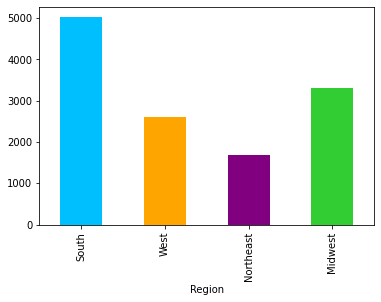

In [3]:
def chart(crime_dict):
    
    pdDict={"Incidents":pd.Series(crime_dict.values()),"Region":pd.Series(crime_dict.keys())}
    df=pd.DataFrame(pdDict)
    print(df)
    df.plot.bar(x='Region', y='Incidents', legend=False, color=['deepskyblue', 'orange','purple','limegreen'])

#bar chart Murders by Region
crimeDict=accum_crime("Region", "Murder", crime_list)
tuplezip=[(region, value) for region, value in zip(list(crimeDict.keys()), list(crimeDict.values()))]
print("Murder by Region ")
chart(accum_crime("Region", "Murder", crime_list))

Violent Crime by Region
   Incidents     Region
0     331011      South
1     259401       West
2     156891  Northeast
3     211854    Midwest


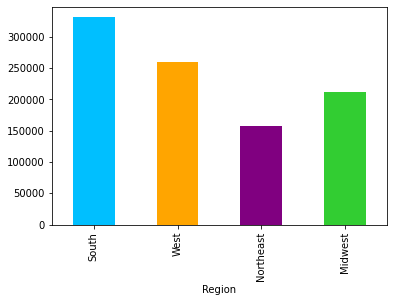

In [4]:
#bar chart Violent Crimes by Region
crimeDict=accum_violent("Region", crime_list)
tuplezip=[(region, value) for region, value in zip(list(crimeDict.keys()), list(crimeDict.values()))]
print("Violent Crime by Region")
chart(accum_violent("Region", crime_list))

Nonviolent Crime by Region
   Incidents     Region
0    2080097      South
1    1781665       West
2     760200  Northeast
3    1226462    Midwest


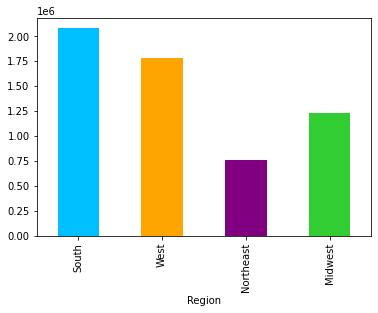

In [5]:
#bar char Non-violent Crimes by Region
crimeDict=accum_nonviolent("Region", crime_list)
tuplezip=[(region, value) for region, value in zip(list(crimeDict.keys()), list(crimeDict.values()))]
print("Nonviolent Crime by Region")
chart(accum_nonviolent("Region", crime_list))

In [6]:
#tabular list showing the total violent crimes for each State 
#and the distance from the natl mean
stateViolence=accum_violent("State",crime_list)
totalCrime=0
aveCrime=0
numStates=0
for state in stateViolence:
    numStates+=1
    crimeNum=int(stateViolence[state])
    totalCrime+=crimeNum
aveCrime=int(totalCrime/numStates)
print("National Average Violent Crime:", aveCrime, "\n")
print("{:<22}{:>7}{:>20}".format("State", "Crimes","Distance from Mean"))
for state in stateViolence:
    crimeNum=int(stateViolence[state])
    print("{:<22}{:>7,}{:>9,}".format(state, crimeNum, (crimeNum-aveCrime) ))


National Average Violent Crime: 18807 

State                  Crimes  Distance from Mean
ALABAMA                15,350   -3,457
ALASKA                  4,697  -14,110
ARIZONA                23,856    5,049
ARKANSAS               12,048   -6,759
CALIFORNIA            145,205  126,398
COLORADO               15,533   -3,274
CONNECTICUT             7,754  -11,053
DELAWARE                2,359  -16,448
DISTRICT OF COLUMBIA    7,711  -11,096
FLORIDA                50,540   31,733
GEORGIA                18,496     -311
HAWAII                  3,331  -15,476
IDAHO                   2,676  -16,131
ILLINOIS               50,968   32,161
INDIANA                21,325    2,518
IOWA                    7,533  -11,274
KANSAS                  7,982  -10,825
KENTUCKY                8,342  -10,465
LOUISIANA              16,444   -2,363
MAINE                   1,254  -17,553
MARYLAND               14,175   -4,632
MASSACHUSETTS          24,155    5,348
MICHIGAN               35,790   16,983
MINNESOTA    